# Multiply the value of x by 1000 and then plot the loss vs epochs.

In [1]:
#making the imports
import numpy as np
import matplotlib.pyplot as plt

#generating dataset
def model(x,noise=False,mean=0,var=0.25):
    if not noise: return x
    
    return x + np.random.normal(mean,var,x.shape)
    
x = np.linspace(-1,10,50)*1000 

In [2]:
#standardlizing
x_transform = []
for i in range(len(x)):
    x_transform.append((x[i]-min(x))/(max(x)-min(x)))
x_transform = np.array(x_transform)
y = model(x_transform,True)

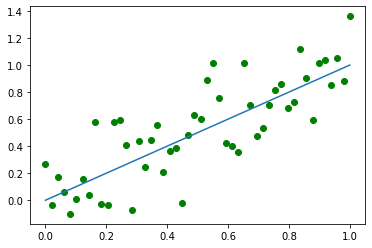

In [3]:
plt.scatter(x_transform,y,color = "green")
plt.plot(x_transform,x_transform)

In [4]:
#calculating mse
def mse(yt,yp):
    return (np.sum((yt-yp)**2)/len(yt))

def updates(yt,yp,x,lr,m,c):
    m = m- lr*((-x)*(np.sum(yt-yp)/len(yt))*2)
    c = c- lr*((-1)*(np.sum(yt-yp)/len(yt))*2)

    return m,c

(2.8948577798109927, 27.127986007393037)

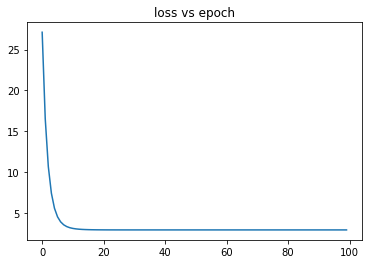

In [5]:
#taking random value of m and c
m=10
c=0
lr=0.1

total_loss = []
for i in range(100):
    yp = m*x_transform + c    
    loss = mse(y,yp)
    total_loss.append(loss)
    m,c = updates(y,yp,x_transform,lr,m,c)

plt.plot(total_loss)
plt.title('loss vs epoch')
total_loss[-1], total_loss[0]

# Linear Regression model for housing data using Gradient Descent

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
#loading dataset
#data handling
import pandas as pd
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Real estate.csv")

In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
print(df.shape)
#print(df.head)

(414, 8)


In [9]:
df.drop(['No'],axis=1,inplace=True)

In [10]:
#splitting in 80:20 ratio, as more suitable
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 331
No. of testing examples: 83


In [11]:
x=training_data.drop('Y house price of unit area',axis=1)
y=training_data['Y house price of unit area']

In [12]:
x_test=testing_data.drop('Y house price of unit area',axis=1)
y_test=testing_data['Y house price of unit area']
#y

In [24]:
#standardlizing
x=x.apply(lambda s:(s-s.mean())/s.std(),axis=0)

In [14]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(331, 6)
(331,)
(83, 6)
(83,)


In [15]:
#assumed value of m and c
m=np.random.randn(x.shape[1])
c=0

In [27]:
print(m)

[ 1.32053363 -2.95671864 -4.65581637  4.28639239  2.63899628  0.47655118]


In [17]:
mse_list=[]
epoch=[]     #epoch(no. of iterations)
lr=0.01
for i in range(1000):
    y_pred=c+np.dot(x,m)
    mse=np.mean((y-y_pred)**2)
    dm=(np.dot((y-y_pred),x)*-2)/len(y)
    dc=(np.mean(y-y_pred)*-2)
    m = m - lr*dm
    c = c - lr*dc
    mse_list.append(mse)
    epoch.append(i)

In [29]:
#mse
#y
#mse_list

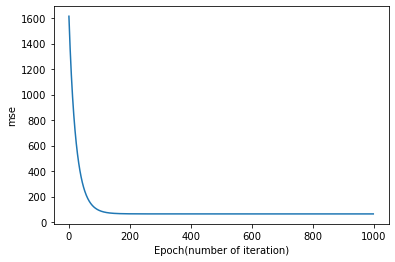

In [19]:
plt.plot(epoch,mse_list)
plt.xlabel("Epoch(number of iteration)")
plt.ylabel("mse")
plt.show()

In [20]:
error=y-y_pred
error

341   -1.066202
225    0.791718
23    -0.451156
411   -6.524196
94     5.954787
         ...   
358   -2.719504
5      0.984351
383    3.544775
79    -1.908538
187   -2.521326
Name: Y house price of unit area, Length: 331, dtype: float64